***Mileage Prediction-Regression Analysis***

**Source**

This dataset was taken from the StatLib library which is maintained at Camegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.

**Data Set Information**

This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan in predicting the attribute 'mpg',8 of the original instances were removed because they had unknown values for the 'mpg' attribute. The original dataet is available in the file "auto-mpg.data-original".

In [1]:
#Import library
import pandas as pd

In [20]:
import numpy as np

In [124]:
import seaborn as sns

In [103]:
#import data
mpg=pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv")
mpg.dropna()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [3]:
#Describe data
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [123]:
#Data preprocessing
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


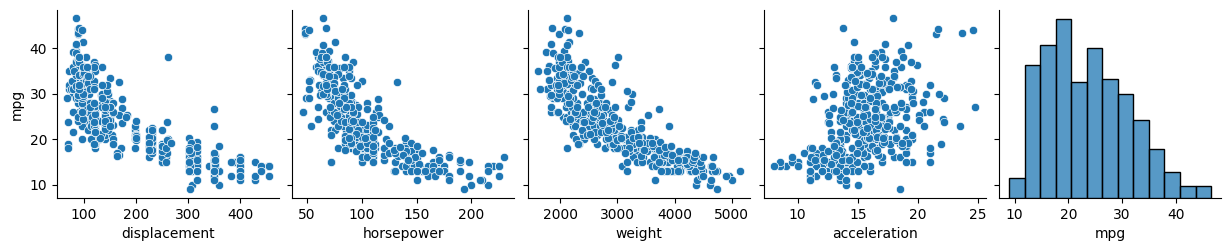

In [125]:
#Data visualization
sns.pairplot(mpg,x_vars=['displacement','horsepower','weight','acceleration','mpg'],y_vars=['mpg']);

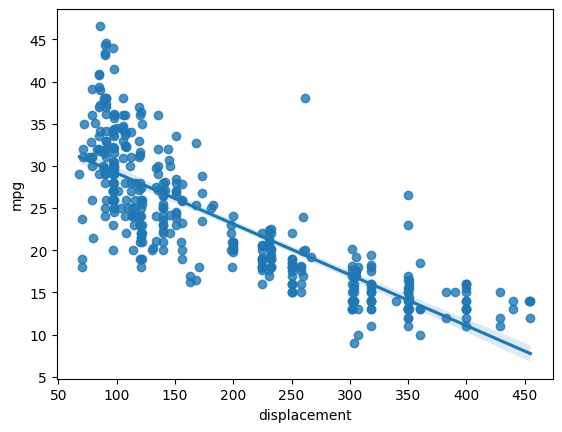

In [126]:
sns.regplot(x='displacement',y='mpg', data=mpg);

In [6]:
#Define target variable (y) and feature variable(x)
mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [112]:
y=mpg['mpg']

In [113]:
x=mpg[['displacement', 'horsepower', 'weight',
       'acceleration']]
x.fillna(0,inplace=True)
y.fillna(0,inplace=True)


<ipython-input-113-539a611212b4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.fillna(0,inplace=True)


In [114]:
#Split
from sklearn.model_selection import train_test_split

In [115]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2529)

In [116]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((298, 4), (100, 4), (298,), (100,))

In [117]:
#Modeling
from sklearn.linear_model import LinearRegression

In [118]:
model=LinearRegression()

In [119]:
model.fit(x_train,y_train)


LinearRegression()

In [81]:
y_pred=model.predict(x_test)

In [82]:
model.intercept_

43.579579629071006

In [84]:
model.coef_

array([-0.00301729, -0.02713168, -0.00621834,  0.11777367])

In [90]:
#Prediction
y_pred=model.predict(x_test)

In [86]:
y_pred

array([15.60466523, 31.25974988, 19.02444647, 24.09336201, 32.76613849,
       29.78405728, 25.31833908, 12.5548358 ,  8.80664673, 28.97937698,
       30.74463537, 20.9776107 , 31.85575789, 14.73721069, 20.52327908,
       15.0643007 , 24.61356911, 31.95796867, 14.42742023, 11.13566553,
       18.47960859, 30.70009891, 26.71027938, 18.7503587 , 20.28632598,
       26.46745082, 33.04254375, 30.54397585,  9.76364751, 25.79487214,
        8.27031069, 26.9796816 , 30.76501417, 22.00366564, 18.09001028,
       21.00297659, 10.17951695, 22.73853113, 31.28273042, 33.62863412,
       25.0297599 , 31.30781048, 27.35556269, 18.02961861, 22.50253909,
       26.77703257, 20.49246888, 29.42345891, 23.93052374, 24.62918778,
       27.42689679, 12.62881717, 22.98784264, 32.65914855, 19.08284086,
       14.05273118, 30.81476181, 27.10175257, 21.23671284, 29.74893412,
       23.54643218, 31.87250758, 23.7367011 ,  8.08275631, 31.87477956,
       19.8836886 , 27.3884589 , 21.47008818, 11.22032771, 28.96

In [120]:
#Accuracy
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error

In [121]:
mean_absolute_error(y_test,y_pred)

3.4660809596821816

In [122]:
mean_absolute_percentage_error(y_test,y_pred)

0.1595553613092941